# Importing Necessary Libraries -

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sb.set()
sb.set_style("white")
%matplotlib inline
rcParams['figure.figsize'] = [10,7]

# Loading the dataset -

In [3]:
data = pd.read_csv(r'datasets/Airline_Delay_Cause.csv')

In [4]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [5]:
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [7]:
# Descriptive Statistics of the data -
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,171666.0,2018.551361,2.890006,2013.0,2016.00,2019.00,2021.00,2023.00
month,171666.0,6.493633,3.440908,1.0,4.00,7.00,9.00,12.00
arr_flights,171426.0,362.528467,992.894662,1.0,50.00,100.00,250.00,21977.00
arr_del15,171223.0,66.434387,179.540694,0.0,6.00,17.00,47.00,4176.00
carrier_ct,171426.0,20.796615,50.315176,0.0,2.16,6.40,17.26,1293.91
weather_ct,171426.0,2.250347,7.314252,0.0,0.00,0.40,1.86,266.42
nas_ct,171426.0,19.381147,61.675244,0.0,1.00,3.91,11.71,1884.42
security_ct,171426.0,0.157096,0.717405,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,171426.0,23.770554,72.393477,0.0,1.23,5.00,15.26,2069.07
arr_cancelled,171426.0,7.530497,43.654880,0.0,0.00,1.00,4.00,4951.00


In [8]:
print((data.shape),'\n')
print("Shape of Airline_Delay_Cause.csv: ", data.shape)

(171666, 21) 

Shape of Airline_Delay_Cause.csv:  (171666, 21)


# Data Cleaning -
### a. Check for Missing Values
### b. Handle Missing Values
### c. Remove Duplicates

#### a. Check for Missing Values

In [9]:
missing_values = data.isnull().sum()
display(missing_values[missing_values>0].sort_values(ascending=False).to_frame(name='Missing Values'))

,Missing Values
arr_del15,443
arr_flights,240
carrier_ct,240
weather_ct,240
nas_ct,240
security_ct,240
late_aircraft_ct,240
arr_cancelled,240
arr_diverted,240
arr_delay,240


#### b. Handle Missing Values

In [10]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [11]:
data.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

#### c. Remove Duplicates

In [12]:
duplicates = data[data.duplicated()]

In [13]:
duplicates

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


### Univariate Analysis -

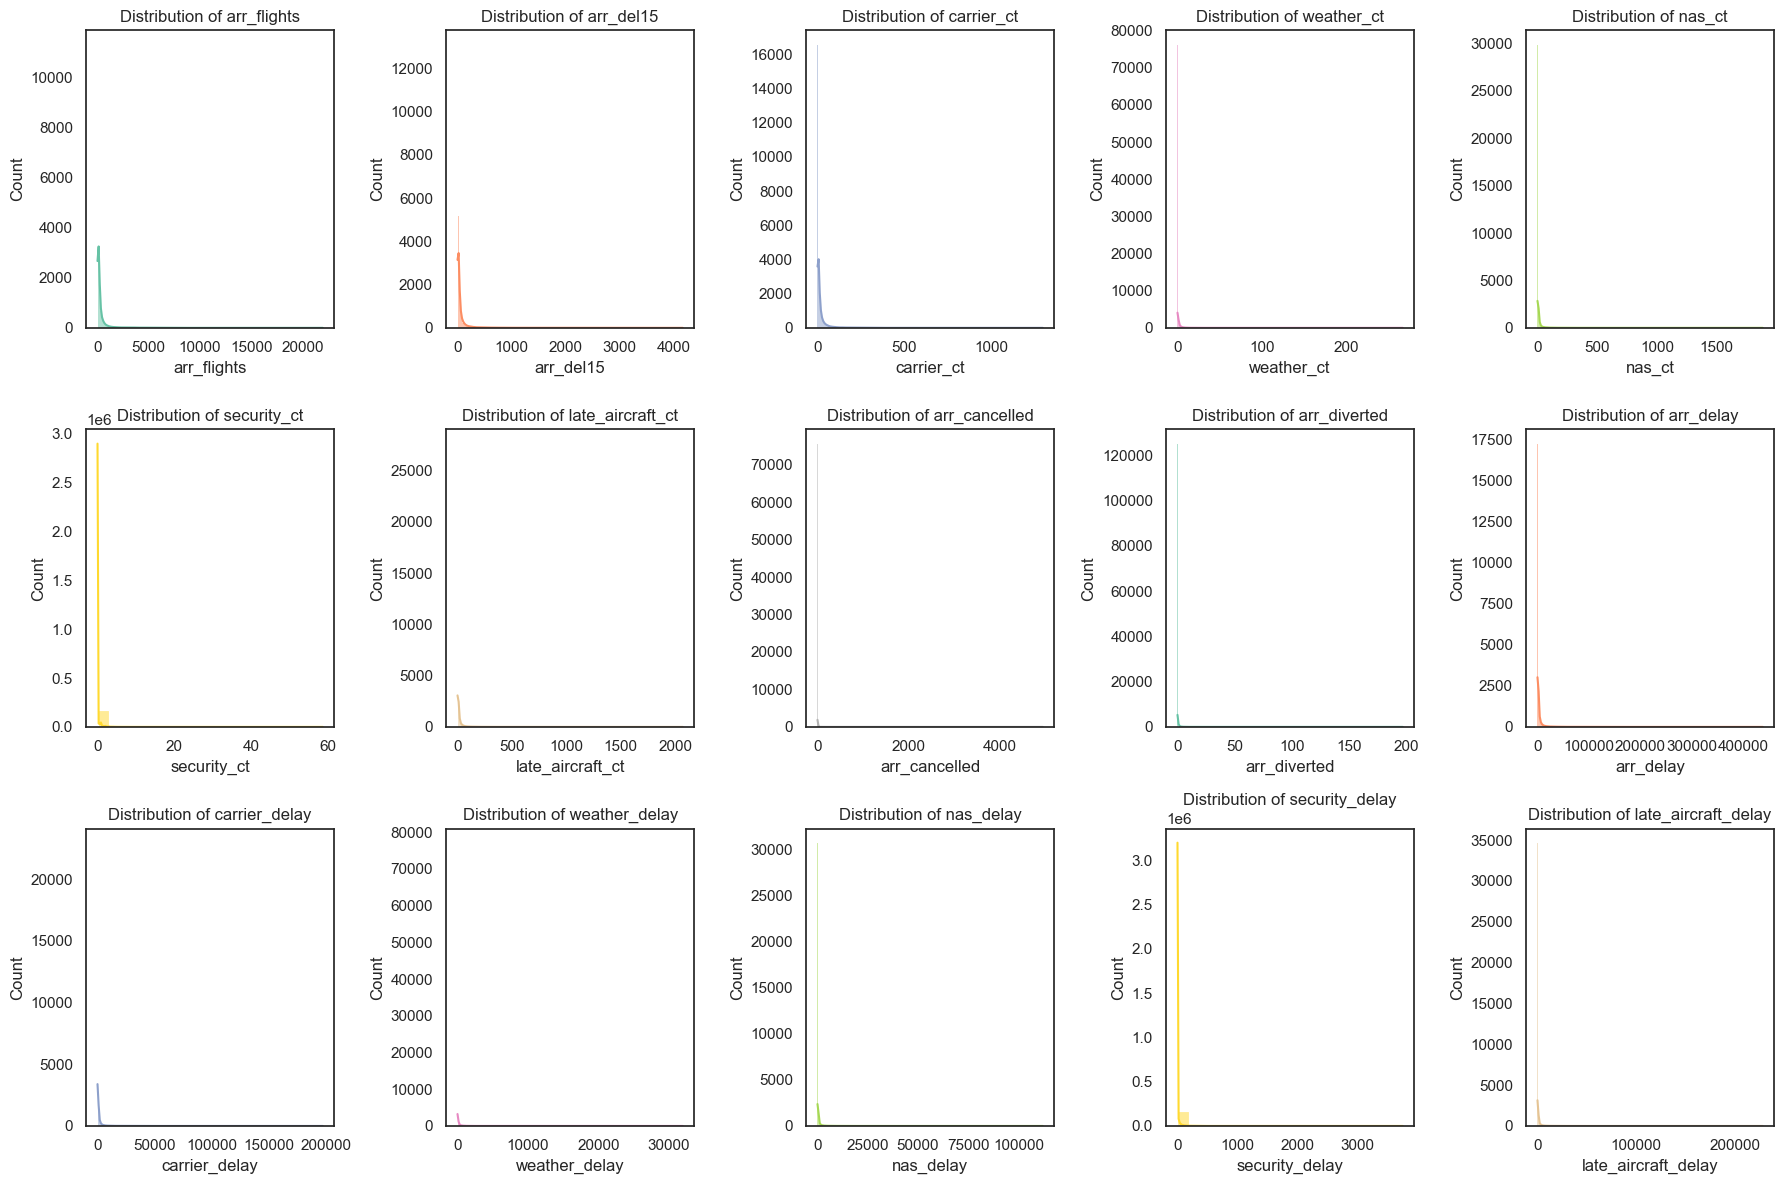

In [14]:
# Distribution of Numeric Features
numeric_features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                    'security_delay', 'late_aircraft_delay']

n_cols = 5
n_rows = int(np.ceil(len(numeric_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color=sns.color_palette('Set2')[i % 8])
    axes[i].set_title(f'Distribution of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 🔍 Key Insights from Feature Distributions

- Most variables are **heavily right-skewed**, with values clustered near zero.
- **Delay causes (counts and durations)** such as `weather_ct`, `carrier_ct`, `late_aircraft_ct`, etc., occur infrequently but can lead to significant delays.
- **Outliers** are present in fields like `arr_delay`, `carrier_delay`, and `late_aircraft_delay`, suggesting the need for transformation or clipping.
- **Security-related delays** are almost negligible in both count and duration.
- Distributions imply **high variance and sparsity**, indicating potential benefits from normalization or log scaling.

### Bivariate Analysis -

<Figure size 500x500 with 0 Axes>

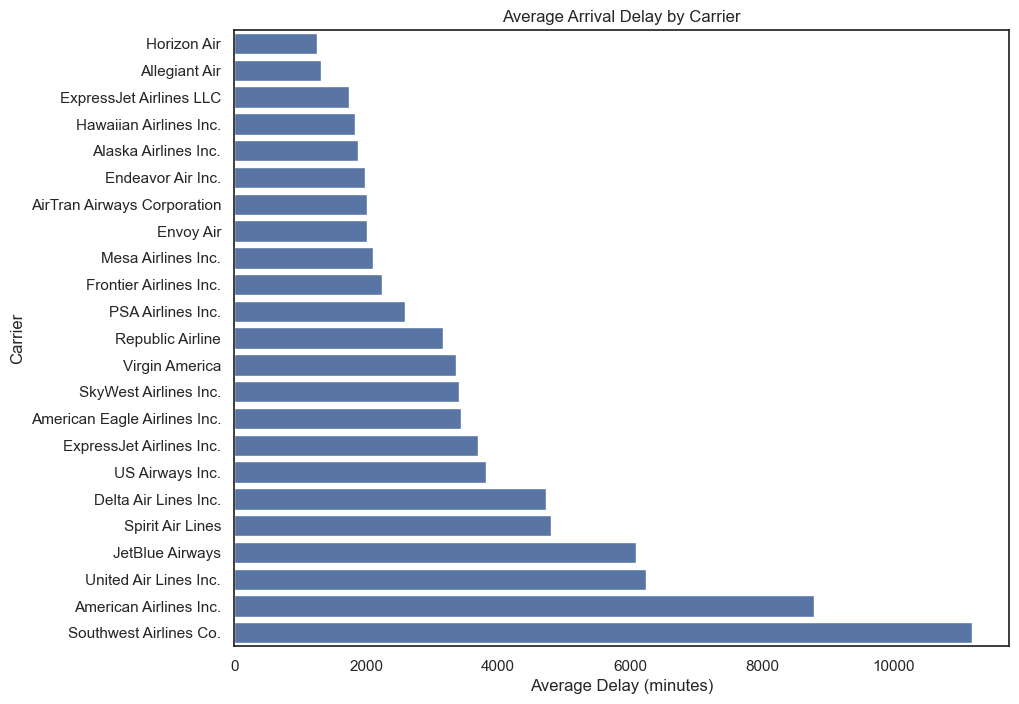

In [15]:
# Performance Analysis Example: Average delay by carrier
plt.figure(figsize=(5,5))
carrier_delay_avg = data.groupby('carrier_name')['arr_delay'].mean().sort_values()
plt.figure(figsize=(10, 8))
sns.barplot(x=carrier_delay_avg, y=carrier_delay_avg.index)
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.show()

### ✈️ Average Arrival Delay by Carrier

- **Southwest Airlines Co.** and **American Airlines Inc.** exhibit the **highest average arrival delays**, exceeding 8,000 minutes.
- In contrast, **Horizon Air** and **Allegiant Air** show the **lowest average delays**, indicating better punctuality.

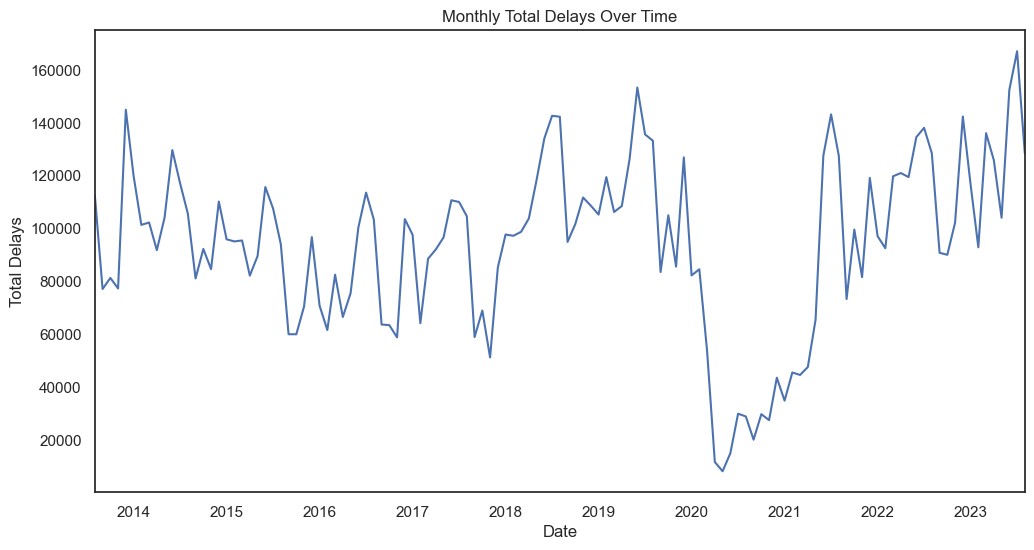

In [16]:
# Trend Identification Example: Total delays over time
data['date'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))
monthly_delays = data.groupby('date')['arr_del15'].sum()
plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='line')
plt.title('Monthly Total Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Total Delays')
plt.show()

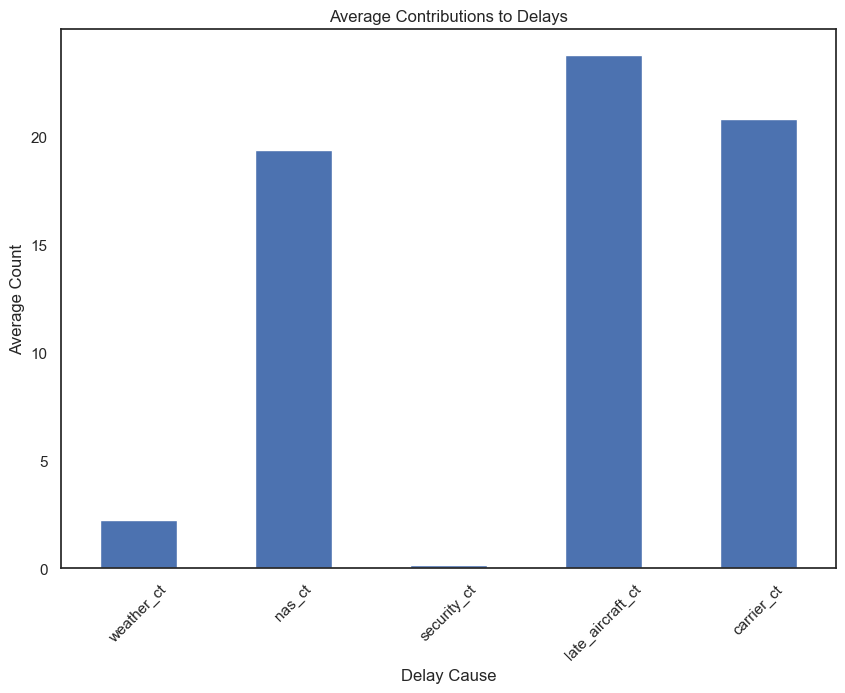

In [17]:
# Root Cause Analysis: Contribution of delay factors
delay_factors = data[['weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'carrier_ct']].mean()
delay_factors.plot(kind='bar')
plt.title('Average Contributions to Delays')
plt.xlabel('Delay Cause')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.show()

### Encoding the data

In [18]:
encoder = LabelEncoder()
for col in cat_cols:
        data[col] = encoder.fit_transform(data[col])

In [19]:
types = data.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
year,int64
month,int64
carrier,int64
carrier_name,int64
airport,int64
airport_name,int64
arr_flights,float64
arr_del15,float64
carrier_ct,float64
weather_ct,float64


### Multi - Variate Analysis -

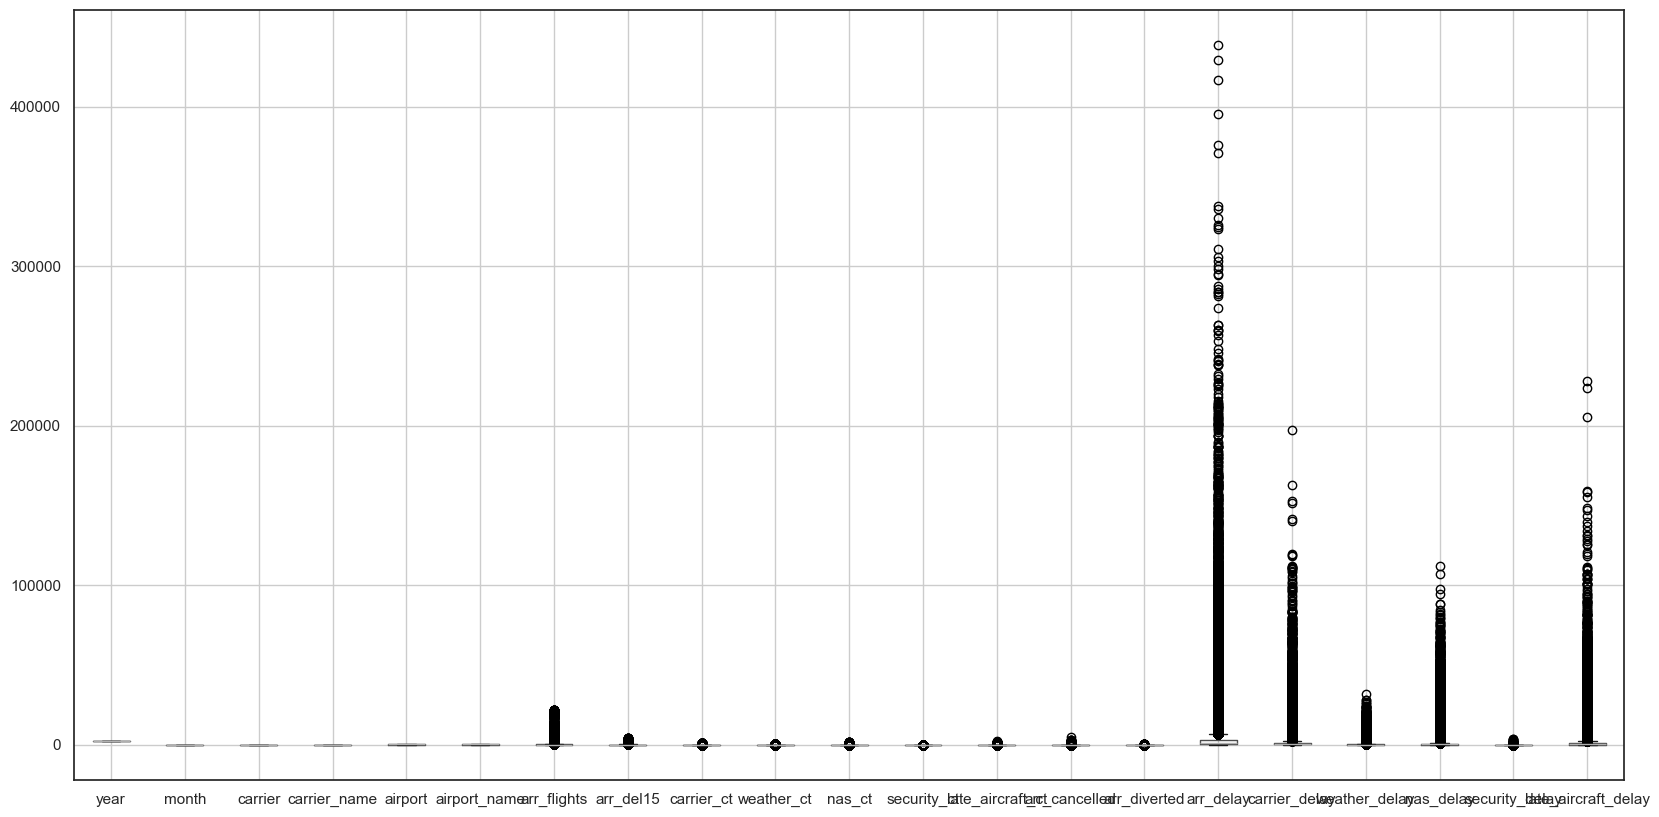

In [25]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

### 📊 Outlier Removal Using IQR

We remove outliers from delay-related columns using the IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR).

In [ ]:
delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Remove outliers using IQR
for col in delay_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

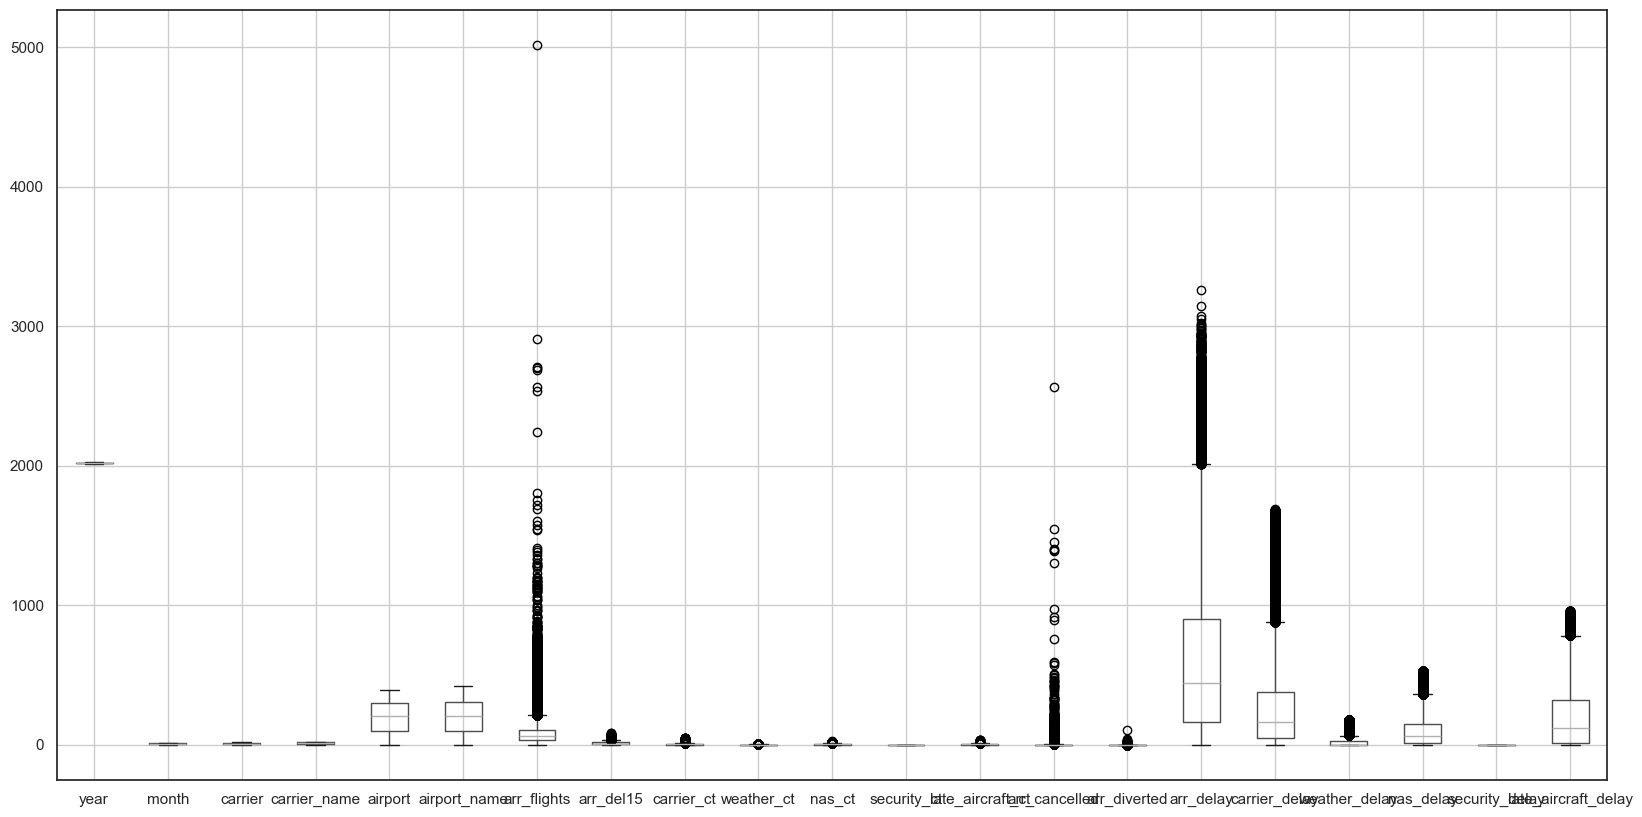

In [28]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

#### Correlation Matrix -

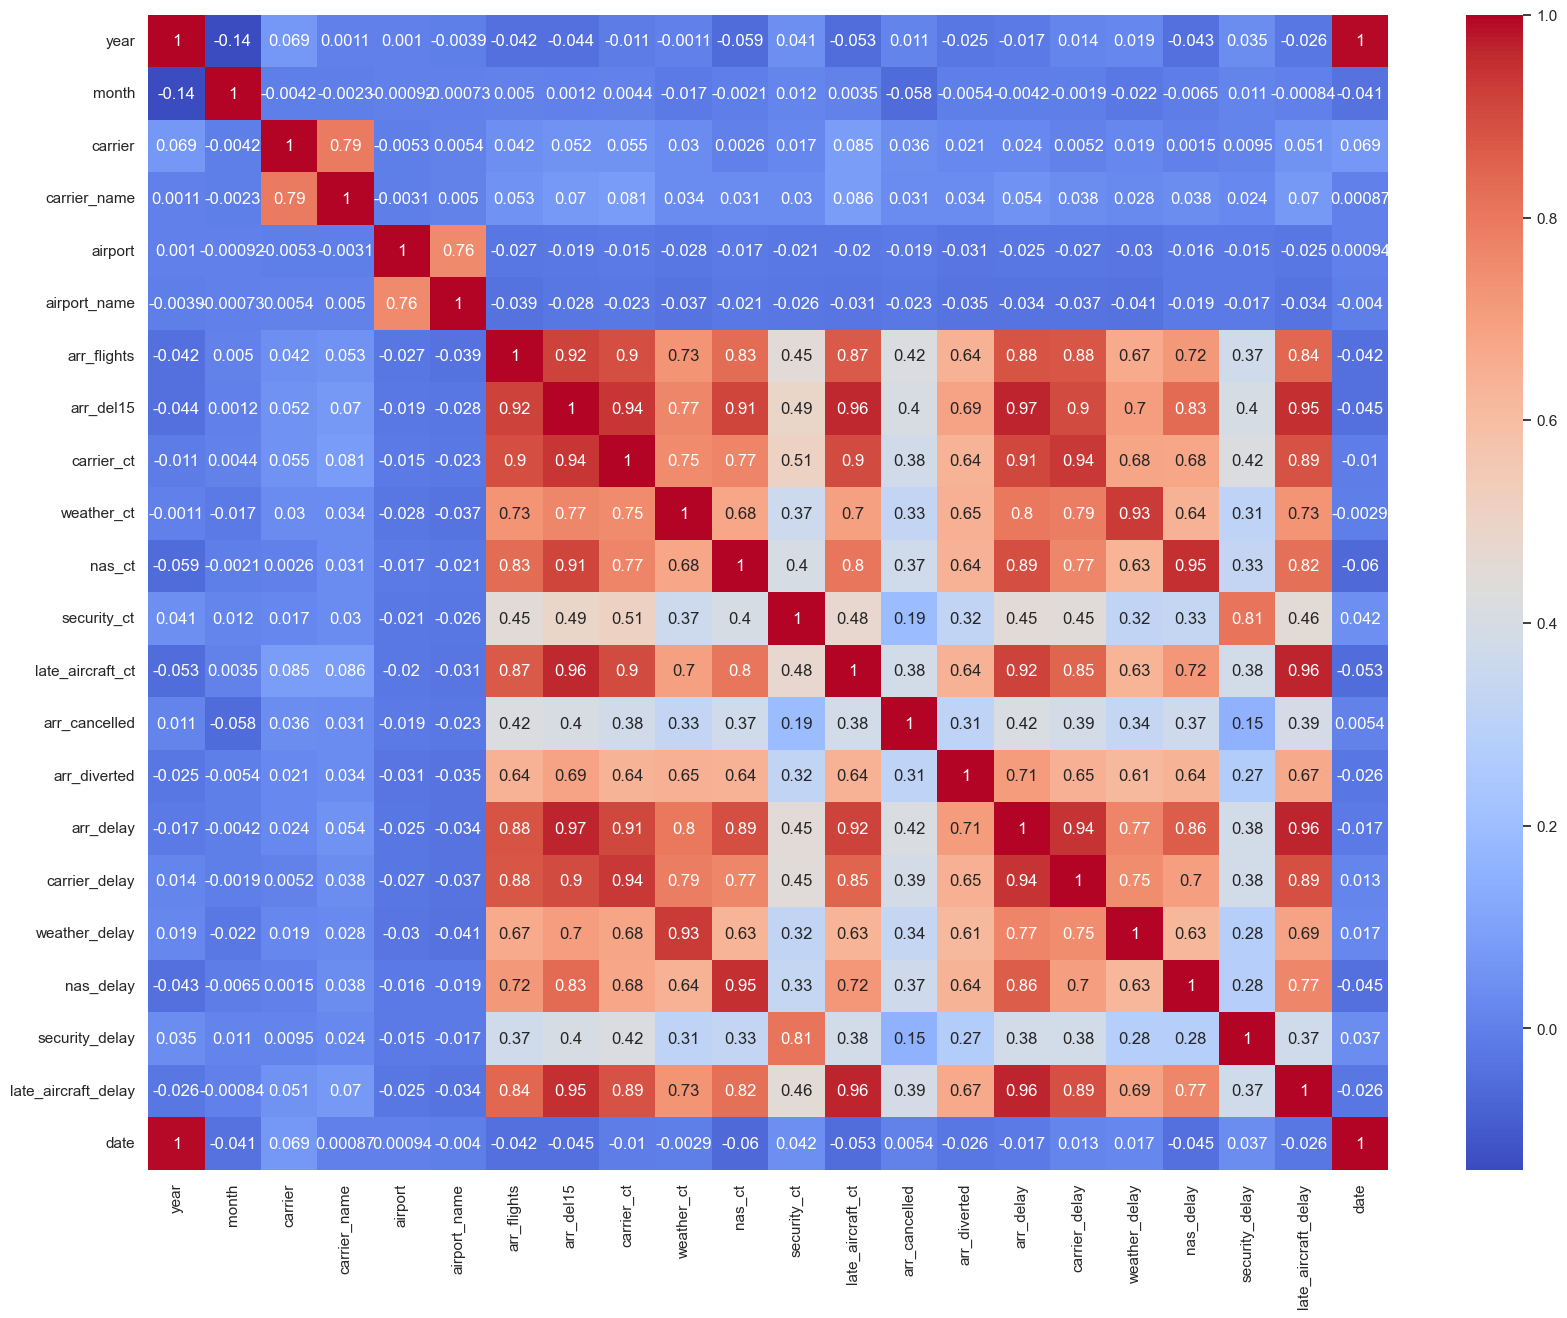

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cmap = "coolwarm", annot=True)
plt.show()

### 📈 Correlation Heatmap Insights

- `arr_delay` is highly correlated with `late_aircraft_delay` (0.96), `carrier_delay` (0.94), and `nas_delay` (0.86) — these are major contributors to total delays.
- `arr_flights` strongly correlates with most *_ct columns, indicating more flights → more delay events.
- High multicollinearity detected among delay components

# Splitting the dataset -

### Creating the Features and Target Variable -

In [38]:
# Data Preprocessing for Predictive Modeling
columns_to_drop = ['year', 'month', 'arr_del15']
data_features = data.drop(columns=columns_to_drop)

X = data_features
datetime_columns = X.select_dtypes(include=['datetime64[ns]']).columns
X = X.drop(columns=datetime_columns)

X = X.astype(float)
y = data['arr_del15'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((80798, 18), (20200, 18), (80798,), (20200,))

In [37]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

Linear Regression R^2 Score: 0.9953322490350408
Linear Regression MSE: 0.45694689630392127
